In [1]:
import numpy as np
import pandas as pd
import os,sys
import operator
import re,string
from sklearn import model_selection

In [2]:
# list of all stop words
stop_words = ['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and',
    'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being',
    'below', 'between', 'both', 'but', 'by', "can't", 'cannot', 'could', "couldn't",
    'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during',
    'each', 'few', 'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't", 'have',
    "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's",
    'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'i', "i'd", "i'll",
    "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself',
    "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of',
    'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours', 'ourselves',
    'out', 'over', 'own', 'same', "shan't", 'she', "she'd", "she'll", "she's",
    'should', "shouldn't", 'so', 'some', 'such', 'than', 'that', "that's", 'the',
    'their', 'theirs', 'them', 'themselves', 'then', 'there', "there's", 'these',
    'they', "they'd", "they'll", "they're", "they've", 'this', 'those', 'through',
    'to', 'too', 'under', 'until', 'up', 'very', 'was', "wasn't", 'we', "we'd", "we'll",
    "we're", "we've", 'were', "weren't", 'what', "what's", 'when', "when's", 'where',
    "where's", 'which', 'while', 'who', "who's", 'whom', 'why', "why's", 'with',
    "won't", 'would', "wouldn't", 'you', "you'd", "you'll", "you're", "you've",
    'your', 'yours', 'yourself', 'yourselves']

In [3]:
#X is a list further made in form of tuple , where first element is name of document and second is the text in documents.
#Y is the category
X  =[] 
Y = []
for category in os.listdir("datasets"):
    for document in os.listdir("datasets/"+category):
        with open("datasets/"+category+'/'+document, "r") as f:
            X.append((document,f.read()))
            Y.append(category)

In [4]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [5]:
print(len(x_train))
print(len(x_test))

14997
5000


In [6]:
#Making Dictionary of words with their corresponding frequency
dict = {}

for i in range (len(x_train)):
    words = x_train[i][1].lower()
    
    stripped_word = re.split(r'\W+',words)
    for word in stripped_word:
        #we will not include stop_words, alpha-numerics, punctuations or irrelevant word of length less than 2 in our dictionary
        if not(word.isalpha()) or word in stop_words or len(word)<2:
            continue
        if word in dict:
            dict[word] += 1
        else:
            dict[word] = 1

In [7]:
# Sorting the dictionary of words with their corresponding frequency
sorted_dict = sorted(dict.items(),key=lambda item:item[1], reverse = True)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

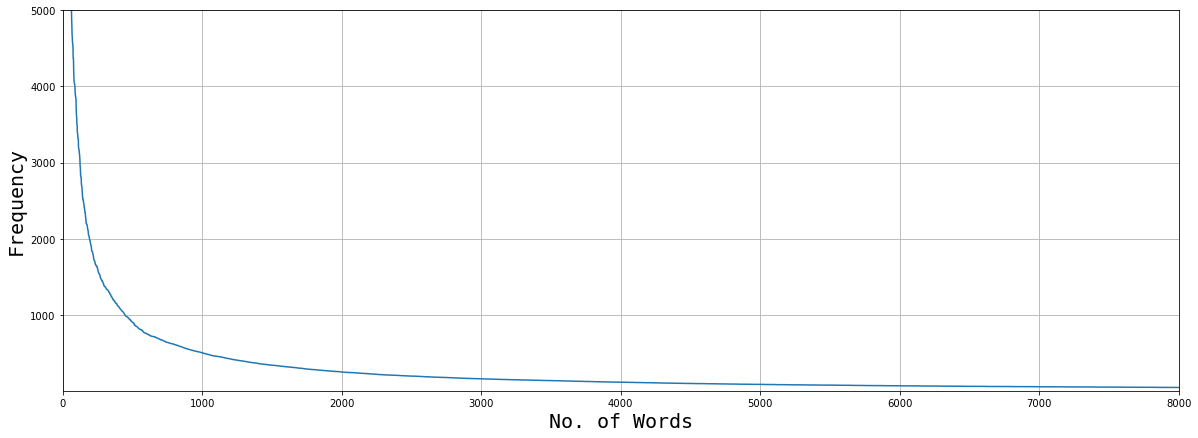

In [9]:
#Plotting graph on no. of words vs frequency
features = sorted_dict
No_of_words = []
frequency = []
for i in range (len(features)):
    No_of_words.append(i)
    frequency.append(features[i][1])
plt.figure(figsize=(20,7))
sns.lineplot(x=No_of_words,y=frequency)
plt.axis([0,8000,1,5000])
plt.grid()
plt.xlabel('No. of Words', fontdict={'fontname': 'Monospace', 'fontsize': 20})
plt.ylabel('Frequency', fontdict={'fontname': 'Monospace', 'fontsize': 20})
plt.show()

In [10]:
# Selecting first 2000 features
feature_list = [features[i][0] for i in range(2000)]

In [11]:
#Making x_train_dataset
x_train_dataset = np.zeros([len(x_train),len(feature_list)],int)
for i in range (len(x_train)):
    words = x_train[i][1].lower()
    
    stripped_word = re.split(r'\W+',words)
    
    for word in stripped_word:
        
        if word in feature_list:
            x_train_dataset[i][feature_list.index(word)] += 1

In [12]:
#Making x_test_dataset
x_test_dataset = np.zeros([len(x_test),len(feature_list)],int)
for i in range (len(x_test)):
    words = x_test[i][1].lower()
    
    stripped_word = re.split(r'\W+',words)
    
    for word in stripped_word:
        
        if word in feature_list:
            x_test_dataset[i][feature_list.index(word)] += 1

# Self Implementation of Naive Bayes

In [13]:
#Making dictionary for implementing Naive Baye's
def fit(x_train_dataset,y_train):
    count={}
    total_word=0
    y_train=np.array(y_train)
    #Total no. of document is calculated
    count["total_doc"]=len(y_train)
    classes=set(y_train)
    for i in classes:
        temp=0
        #selecting x_train corresponding to class present in y_train
        x_train_with_i=x_train_dataset[y_train==i]
        #finding length of data with category corresponding to i 
        temp2=x_train_with_i.shape[0]
        count[i]={}
        #Iterating over feature_list
        for feature in feature_list:
            #Calculating total word in feature
            l=(x_train_with_i[:,feature_list.index(feature)]).sum()
            count[i][feature]=l
            temp+=l
        #Total word in that class
        count[i]["word_in_class"]=temp
        #Length of data with y_train belonging to specific class
        count[i]["length"]=temp2
        
    
    return count

In [14]:
def probability(x_test,dic,classes):
    prob=np.log(dic[classes]["length"])-np.log(dic["total_doc"])
    feature=list(dic[classes].keys())
    #-2 is done becuase there will be "length" and "word in class" present in feature. 
    for j in range (len(feature)-2):
        xj=x_test[j]
        #If frequency is 0, we will not consider it
        if xj==0:
            current_prob=0
        else:
            #Extra addition part is Laplace correction
            num=dic[classes][feature[j]]+1
            den=dic[classes]["word_in_class"]+len(dic[classes].keys())-2
            current_prob=np.log(num)-np.log(den)
        prob+=current_prob
    return prob

In [15]:
#Best_class or probable answer will be returned from here
def predict_for_single(x_test,dic):
    first_run=True
    classes=dic.keys()
    for i in classes:
        if i=="total_doc":
            continue
        prob=probability(x_test,dic,i)
        if first_run or prob>best_prob:
            best_prob=prob
            first_run=False
            best_class=i
    return best_class

In [16]:
def predict(x_test,dic):
    y_pred=[]
    for x in x_test:
        y_pred.append(predict_for_single(x,dic))
    return y_pred

In [17]:
def score(Y_test,Y_pred):
        count = 0
        for i in range(len(Y_pred)):
            if Y_pred[i] == Y_test[i]:
                count+=1
        return count/len(Y_pred)

In [18]:
dictionary=fit(x_train_dataset,y_train)

In [19]:
y_pred=predict(x_test_dataset,dictionary)

In [20]:
print(score(y_test,y_pred))

0.8452


In [21]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pandas as pd

In [22]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[201   1   0   0   0   0   1   1   2   2   0   0   1   3   0   0   0   0
    0  21]
 [  0 214   0  19   5   3   4   0   0   0   0   0   4   2   2   0   0   0
    0   0]
 [  0  37   3 129   7  52   4   0   0   0   0   3  10   0   1   0   1   0
    2   0]
 [  0   1   0 222  12   0   5   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   2   0  17 211   0   6   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0  23   1  10   8 192   1   0   1   0   0   1   2   1   0   0   0   0
    0   0]
 [  0   0   0   9   1   0 232   9   0   0   0   0   8   1   1   0   0   0
    0   0]
 [  0   0   0   0   1   1  10 247   4   0   0   0   6   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   3   1 278   0   0   0   0   0   0   0   1   0
    1   0]
 [  0   0   0   0   0   0   2   0   1 237   8   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   1   0   5 224   0   0   0   0   0   0   0
    0   0]
 [  0   2   0   0   0   1   0   0   0   0   0 227   3   0   0   0

# Inbuilt Naive Bayes

In [23]:
from sklearn.naive_bayes import MultinomialNB

In [24]:
clf = MultinomialNB()
clf.fit(x_train_dataset, y_train)
y_pred = clf.predict(x_test_dataset)

In [25]:
print('training data score', clf.score(x_train_dataset, y_train))
print('testing data score', clf.score(x_test_dataset, y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

training data score 0.8583049943321998
testing data score 0.8184
[[186   0   0   0   0   0   1   5   3   0   2   0   0   2   0   1   0   0
    0  33]
 [  1 201   0  17   5  14   4   2   0   0   0   0   5   3   1   0   0   0
    0   0]
 [  0  38  18 114  10  53   8   1   0   0   0   1   5   0   1   0   0   0
    0   0]
 [  0   1   0 209  22   0   5   0   0   0   0   0   3   0   0   0   0   0
    0   0]
 [  0   2   0  24 203   0   7   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0  22   1  17  12 175   2   0   2   1   0   1   4   1   2   0   0   0
    0   0]
 [  0   0   0   5   4   0 238   5   1   0   1   1   5   0   0   0   1   0
    0   0]
 [  0   0   0   0   1   0  11 238   8   1   2   0   7   0   0   0   1   0
    0   0]
 [  0   0   0   0   0   0   2   6 274   2   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   3   3   3 225  13   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   3   7 220   0   0   0   1   0   0   0
    0   0]


RESULT:
Sklearn gave score of 0.82 on testing data, whereas self implemented classifier gave 0.85 on testing data which is close.